# Part II - (Factors influencing Loan Decision and Loan Amount)
## by (Chimaobi Uwakwe)

## Dataset Overview

> This data set is the Prosper Loan Data which contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
column= ['LoanNumber','LoanOriginalAmount','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','LoanOriginationDate','Term','EmploymentStatusDuration','LoanStatus','ClosedDate','BorrowerAPR','BorrowerState','EmploymentStatus','DebtToIncomeRatio','StatedMonthlyIncome','ProsperScore','Occupation']
#Load csv file into a dataframe name loan_data and filter to have only the features in column
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data1 = loan_data[column]
#drop duplicates
loan_data1 = loan_data1.drop_duplicates(subset=['LoanNumber','LoanOriginalAmount','LoanOriginationDate','Term','LoanStatus','ClosedDate','BorrowerAPR','BorrowerState','EmploymentStatus','DebtToIncomeRatio','StatedMonthlyIncome'], keep='first')
#change date format 
loan_data1['ClosedDate'] = pd.to_datetime(loan_data1['ClosedDate'])
loan_data1['LoanOriginationDate'] = pd.to_datetime(loan_data1['LoanOriginationDate'])
#Drop empty cells
loan_data1 = loan_data1.dropna(subset=['BorrowerState','EmploymentStatus','DebtToIncomeRatio','Occupation', 'ProsperScore','EstimatedReturn','EmploymentStatusDuration'])

loan_data1 = loan_data1[loan_data1['EmploymentStatus'] != 'Other']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

## 1. Preferred Loan term by Borrowers and which category were most favoured
The Loans with 36 months term were the largest and the borrowers in the employed category were most favoured.


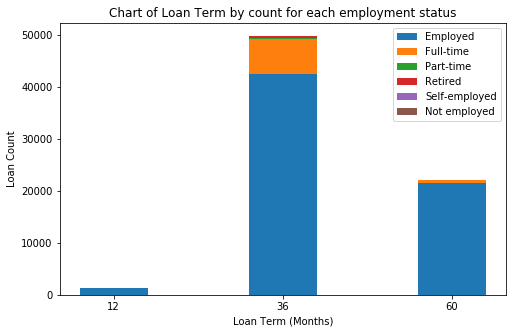

In [3]:
term_order = [12, 36, 60]
employment_order = ['Employed', 'Full-time', 'Part-time', 'Retired','Self-employed','Not employed']

plt.figure(figsize = [8, 5])

# right plot: stacked bar chart,

baselines = np.zeros(len(term_order))
# for each second-variable category:
for i in range(len(employment_order)):
    # isolate the counts of the first category,
    emp2 = employment_order[i]
    inner_counts = loan_data1[loan_data1['EmploymentStatus'] == emp2]['Term'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(term_order)), height = inner_counts[term_order],
            bottom = baselines, width=0.4)
    baselines += inner_counts[term_order]

plt.xticks(np.arange(len(term_order)), term_order)
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Count')
plt.title('Chart of Loan Term by count for each employment status')
plt.legend(employment_order);

##  2. Yield from range of Loan Amounts

 The Loan Loan amounts range from 1,000 up to 36,000 and the Loan amounts have different Loan APR. A few of the loans had negative yields.

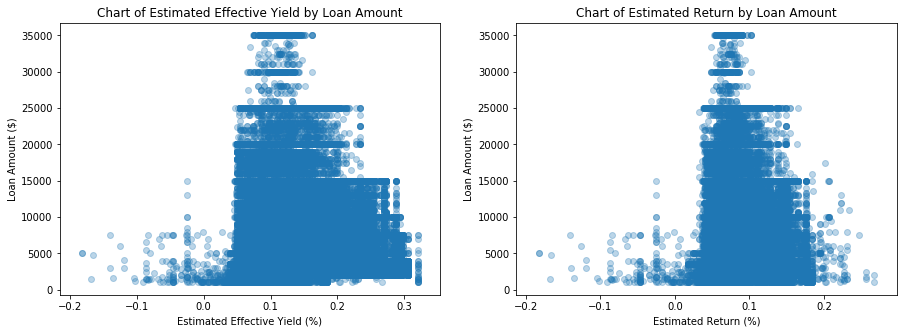

In [4]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.scatter(data=loan_data1, x = 'EstimatedEffectiveYield', y='LoanOriginalAmount', alpha=0.3);
plt.xlabel('Estimated Effective Yield (%)')
plt.ylabel('Loan Amount ($)')
plt.title('Chart of Estimated Effective Yield by Loan Amount');

plt.subplot(1,2,2)
plt.scatter(data=loan_data1, x = 'EstimatedReturn', y='LoanOriginalAmount', alpha=0.3);
plt.xlabel('Estimated Return (%)')
plt.ylabel('Loan Amount ($)')
plt.title('Chart of Estimated Return by Loan Amount');


## Borrower APR for each loan Term distributed by Loan Amount.
Loan amounts at 5,000 and below had the highest APR anf dor 36 months.



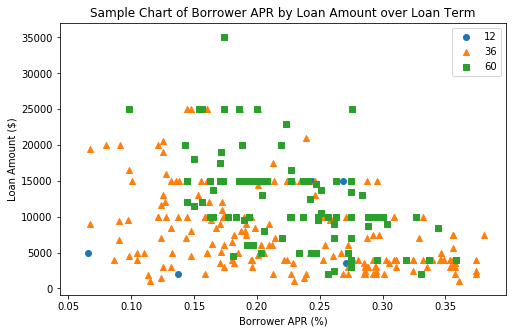

In [5]:
#Seeding random choiced generator
plt.figure(figsize=[8,5])
np.random.seed(2000)
sample = np.random.choice(loan_data1.shape[0], 500, replace=False)
loan_data1_subset = loan_data1.loc[sample]

#Defining shape markers
term_markers = [[12, 'o'],
                [36, '^'],
                [60, 's']]

for term1, marker in term_markers:
    df_term = loan_data1_subset.loc[loan_data1_subset['Term'] == term1]
    plt.scatter(data = df_term, x = 'BorrowerAPR', y = 'LoanOriginalAmount', marker = marker)
plt.legend(['12','36','60'])
plt.xlabel('Borrower APR (%)')
plt.ylabel('Loan Amount ($)')
plt.title('Sample Chart of Borrower APR by Loan Amount over Loan Term');


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 419617 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 